<a href="https://colab.research.google.com/github/iimog/master-bioinf-lecture/blob/main/WS_2022/2-Imaging-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Method Notebook

## Setup

In [1]:
import skimage.io

In [2]:
import matplotlib.pyplot as plt

## Read Image

In [5]:
img = skimage.io.imread("https://figshare.com/ndownloader/files/34498448")

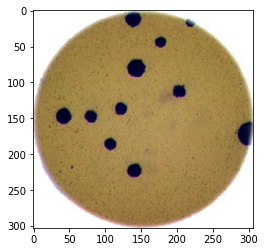

In [6]:
plt.imshow(img)

In [7]:
img.shape

(303, 306, 3)

## Convert to gray

In [8]:
import skimage.color

In [16]:
skimage.color.rgb2gray(img)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [17]:
img.shape

(303, 306, 3)

In [10]:
gray_img = skimage.color.rgb2gray(img)

In [11]:
gray_img.shape

(303, 306)

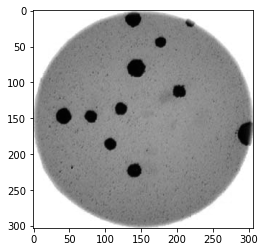

In [18]:
plt.imshow(gray_img, cmap="gray")

## Calculate histogram

In [19]:
import numpy as np

In [22]:
histogram, bin_edges = np.histogram(gray_img, bins=256, range=(0,1))

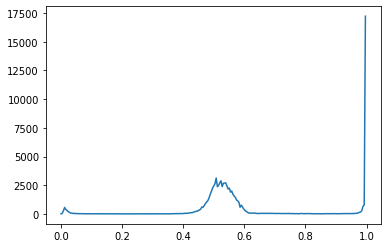

In [25]:
plt.plot(bin_edges[0:-1], histogram)

In [26]:
303 * 306

92718

## Create first mask

In [28]:
mask = gray_img<0.2

In [29]:
mask.shape

(303, 306)

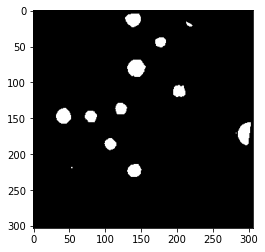

In [30]:
plt.imshow(mask, cmap="gray")

## Add blurring

In [31]:
import skimage.filters

In [37]:
blurred_img = skimage.filters.gaussian(gray_img, sigma=1)

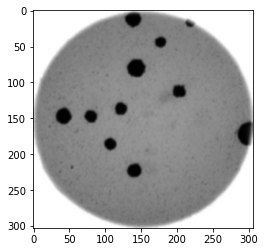

In [38]:
plt.imshow(blurred_img, cmap="gray")

In [39]:
blurred_mask = blurred_img < 0.2

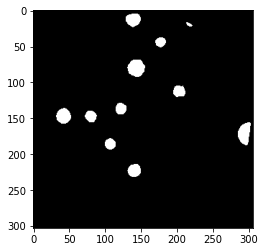

In [40]:
plt.imshow(blurred_mask, cmap="gray")

## Count colonies

In [41]:
import skimage.measure

In [42]:
labeled_image = skimage.measure.label(blurred_mask)

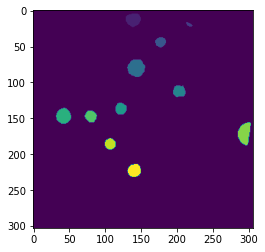

In [44]:
plt.imshow(labeled_image)

In [45]:
labeled_image, count = skimage.measure.label(blurred_mask, return_num=True)

In [46]:
count

11

In [51]:
def analyse_image(filename):
  img = skimage.io.imread(filename)
  plt.imshow(img)
  gray_img = skimage.color.rgb2gray(img)
  blurred_img = skimage.filters.gaussian(gray_img, sigma=1)
  blurred_mask = blurred_img < 0.2
  labeled_image, count = skimage.measure.label(blurred_mask, return_num=True)
  return count

11

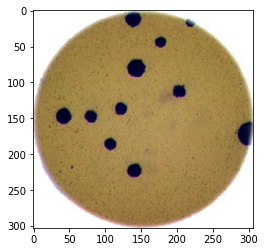

In [52]:
analyse_image("https://figshare.com/ndownloader/files/34498448")

74

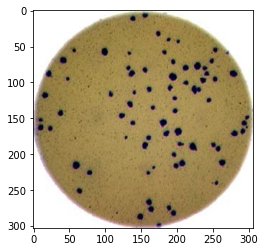

In [53]:
analyse_image("https://figshare.com/ndownloader/files/34498442")

333

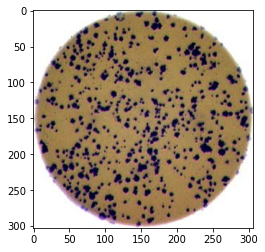

In [54]:
analyse_image("https://figshare.com/ndownloader/files/34498445")